In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
EXPERIMENTS_DIR = Path("experiments")

In [15]:
def read(name):
    experiment_dir = EXPERIMENTS_DIR / f"vetrnik-energy-{name}"
    df = pd.read_csv(experiment_dir / "data.csv")
    # calculated by stats on vetrnik-control
    df["energy_Ws_vetrnik"] -= df["energy_Ws_vetrnik"][0]

    # calculate energy_Ws from vetrnik power measurements
    df["energy_Ws_vetrnik_PC"] = (df["power_vetrnik"] * df["duration"]).cumsum()
    return df

In [16]:
def plot(df):
    df.plot(x="energy_Ws_dmm", y=["energy_Ws_vetrnik", "energy_Ws_vetrnik_PC"])
    x = np.array([0, df.energy_Ws_dmm.max()])
    plt.plot(x, x, label="linear")
    plt.plot(x, x-450, label="linear2")
    plt.grid("both")
    plt.legend()

    # also plot current
    df.plot(x="energy_Ws_dmm", y="current_dmm_A")
    plt.grid("both")

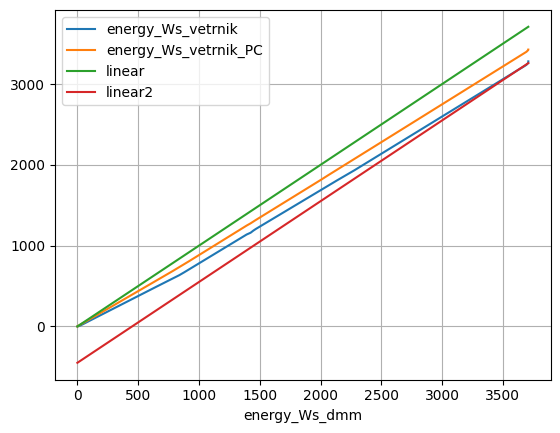

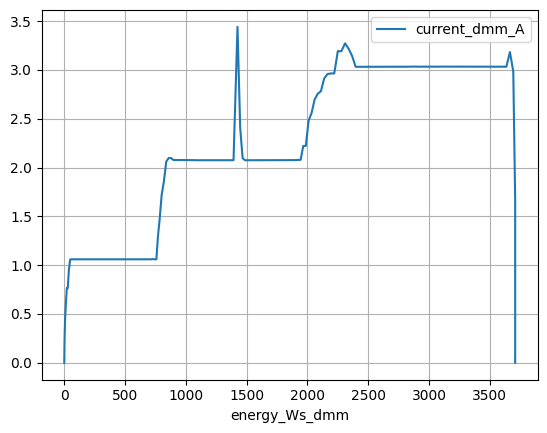

In [17]:
plot(read("run3"))

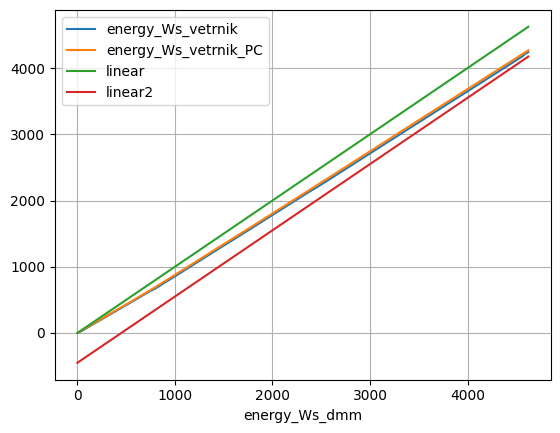

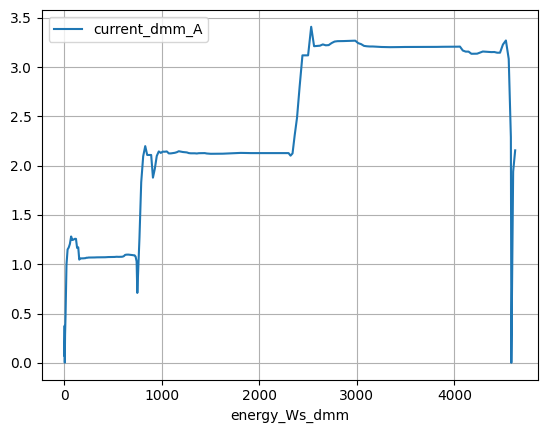

In [18]:
plot(read("run5"))

Oproti DMM to moc nepomohlo, ale v porovnani s `energy_Ws_vetrnik_PC` je to mnohem lepsi.